In [1]:
# Import all the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn. naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Assignment 1.1
# Read in the csv files
exp1a = pd.read_csv('exp1a.csv')
exp1b = pd.read_csv('exp1b.csv')
exp1c = pd.read_csv('exp1c.csv')

In [3]:
# Let's have a look at how many records do we have in each classes
print('Classes in dataframe 1A:')
print(exp1a['class'].value_counts())
print('')
print('Classes in dataframe 1B:')
print(exp1b['class'].value_counts())
print('')
print('Classes in dataframe 1C:')
print(exp1c['class'].value_counts())

Classes in dataframe 1A:
 1    200
-1    200
Name: class, dtype: int64

Classes in dataframe 1B:
-1    200
 1    100
Name: class, dtype: int64

Classes in dataframe 1C:
-1    200
 1     20
Name: class, dtype: int64


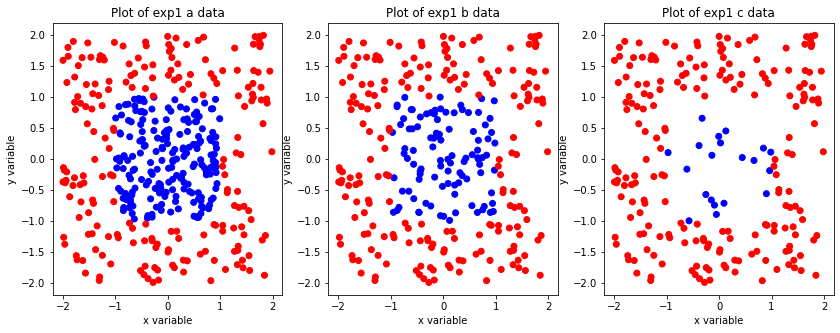

In [4]:
# Task a
# Let's plot the data

colors = ['r', 'b'] 
dic = {1:'a', 2:'b', 3:'c'}
plt.figure(figsize=(14,5))

for i, data in enumerate([exp1a, exp1b, exp1c]):

    plt.subplot(130 + int(i)+1)
    plt.scatter(data['x'], data['y'], c=data['class'], cmap=ListedColormap(colors))
    plt.xlabel('x variable')
    plt.ylabel('y variable')
    plt.title('Plot of exp1 '+str(dic[i+1])+' data')

Confusion Matrix:
 [[194   6]
 [  3 197]]

Confusion Matrix:
 [[183  17]
 [  2 198]]

Confusion Matrix:
 [[177  23]
 [  0 200]]

Confusion Matrix:
 [[171  29]
 [  0 200]]



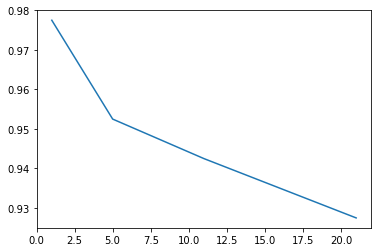

In [5]:
# Task b and c

# Select dependent and independent columns from dataset 1a
X = exp1a.iloc[:,:2].values
y = exp1a.iloc[:,2].values

# Iterate over all of the k parameter
scores = []
for i in [1,5,11,21]:

    model = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(model, X, y, cv=10)
    scores.append(score.mean())
    Y_pred = cross_val_predict(model, X, y, cv=10)
    print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
    print('')

#plot the mean of accuracies
plt.plot([1,5,11,21], scores)
# The accuracy scores gradually decreases with the k parameter

Confusion Matrix:
 [[193   7]
 [  5  95]]

Confusion Matrix:
 [[194   6]
 [  4  96]]

Confusion Matrix:
 [[190  10]
 [  6  94]]

Confusion Matrix:
 [[190  10]
 [  8  92]]



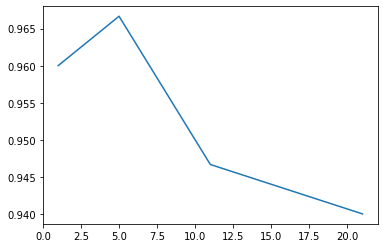

In [6]:
# Select dependent and independent columns from dataset 1b

X = exp1b.iloc[:,:2].values
y = exp1b.iloc[:,2].values

scores = []
for i in [1,5,11,21]:

    model = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(model, X, y, cv=10)
    scores.append(score.mean())
    Y_pred = cross_val_predict(model, X, y, cv=10)
    print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
    print('')

plt.plot([1,5,11,21], scores)
# The highest accuracy can be reached with k=5 parameter.

Confusion Matrix:
 [[194   6]
 [  7  13]]

Confusion Matrix:
 [[200   0]
 [  5  15]]

Confusion Matrix:
 [[200   0]
 [ 12   8]]

Confusion Matrix:
 [[200   0]
 [ 14   6]]



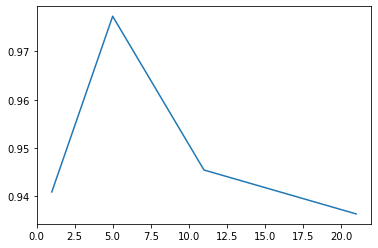

In [7]:
# Select dependent and independent columns from dataset 1c
X = exp1c.iloc[:,:2].values
y = exp1c.iloc[:,2].values

scores = []
for i in [1,5,11,21]:

    model = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(model, X, y, cv=10)
    scores.append(score.mean())
    Y_pred = cross_val_predict(model, X, y, cv=10)
    print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
    print('')

plt.plot([1,5,11,21], scores)
# The highest accuracy can be reached with k=5 parameter.

Confusion Matrix:
 [[194   6]
 [  3 197]]
Confusion Matrix:
 [[189  11]
 [  2 198]]
Confusion Matrix:
 [[186  14]
 [  1 199]]
Confusion Matrix:
 [[179  21]
 [  0 200]]


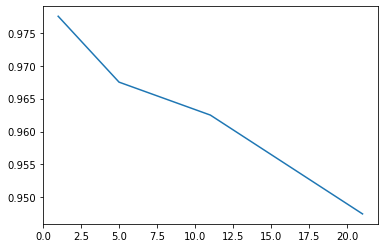

In [8]:
#Task d
# Select dependent and independent columns
X = exp1a.iloc[:,:2].values
y = exp1a.iloc[:,2].values

# Iterate over all of the k parameter
scores = []
for i in [1,5,11,21]:

    model = KNeighborsClassifier(n_neighbors=i, weights='distance') # here we set weights to distance
    score = cross_val_score(model, X, y, cv=10)
    scores.append(score.mean())
    Y_pred = cross_val_predict(model, X, y, cv=10)
    print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))

#plot the mean of accuracies
plt.plot([1,5,11,21], scores)
# We got similar trend although accuracies are a bit higher than it was with uniform weights parameter.

Confusion Matrix:
 [[193   7]
 [  5  95]]

Confusion Matrix:
 [[195   5]
 [  4  96]]

Confusion Matrix:
 [[194   6]
 [  6  94]]

Confusion Matrix:
 [[193   7]
 [  4  96]]



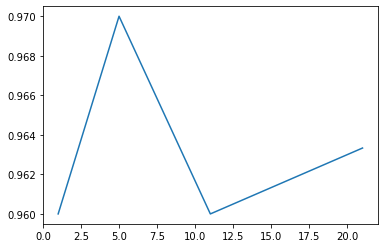

In [10]:
# Select dependent and independent columns
X = exp1b.iloc[:,:2].values
y = exp1b.iloc[:,2].values

# Iterate over all of the k parameter
scores = []
for i in [1,5,11,21]:

    model = KNeighborsClassifier(n_neighbors=i, weights='distance') # here we set weights to distance
    score = cross_val_score(model, X, y, cv=10)
    scores.append(score.mean())
    Y_pred = cross_val_predict(model, X, y, cv=10)
    print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
    print('')

#plot the mean of accuracies
plt.plot([1,5,11,21], scores)
# Here we also got peak at k=5 like previously but got higher score at k=21

Confusion Matrix:
 [[194   6]
 [  7  13]]

Confusion Matrix:
 [[200   0]
 [  5  15]]

Confusion Matrix:
 [[200   0]
 [  7  13]]

Confusion Matrix:
 [[200   0]
 [  7  13]]



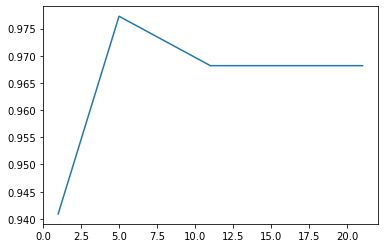

In [11]:
# Select dependent and independent columns
X = exp1c.iloc[:,:2].values
y = exp1c.iloc[:,2].values

# Iterate over all of the k parameter
scores = []
for i in [1,5,11,21]:

    model = KNeighborsClassifier(n_neighbors=i, weights='distance') # here we set weights to distance
    score = cross_val_score(model, X, y, cv=10)
    scores.append(score.mean())
    Y_pred = cross_val_predict(model, X, y, cv=10)
    print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
    print('')

#plot the mean of accuracies
plt.plot([1,5,11,21], scores)
# Completely different trend, although the highest accuracy was obtained at k=5 like we did 
# with uniform weights.

In [12]:
# Task e
# Run Decision Tree Classifier and Logistic Regression on all of the datasets

# Select dependent and independent columns in exp1b dataset
X = exp1a.iloc[:,:2].values
y = exp1a.iloc[:,2].values

# Decision Tree
classifier = DecisionTreeClassifier(criterion='entropy')
treescore = cross_val_score(classifier, X, y, cv=10)
Y_pred = cross_val_predict(classifier, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Decision Tree Accuracy:', treescore.mean())
print('')

# Logistic Regression
log = LogisticRegression()
logscore = cross_val_score(log, X, y, cv=10)
Y_pred = cross_val_predict(log, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Logistic Regression Accuracy:', logscore.mean())

Confusion Matrix:
 [[200   0]
 [  2 198]]
Decision Tree Accuracy: 0.9949999999999999

Confusion Matrix:
 [[100 100]
 [ 90 110]]
Logistic Regression Accuracy: 0.525


In [13]:
# Select dependent and independent columns in exp1b dataset

X = exp1b.iloc[:,:2].values
y = exp1b.iloc[:,2].values

# Decision Tree
classifier = DecisionTreeClassifier(criterion='entropy')
treescore = cross_val_score(classifier, X, y, cv=10)
Y_pred = cross_val_predict(classifier, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Decision Tree Accuracy:', treescore.mean())
print('')

# Logistic Regression
log = LogisticRegression()
logscore = cross_val_score(log, X, y, cv=10)
Y_pred = cross_val_predict(log, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Logistic Regression Accuracy:', logscore.mean())

Confusion Matrix:
 [[200   0]
 [  4  96]]
Decision Tree Accuracy: 0.9866666666666667

Confusion Matrix:
 [[200   0]
 [100   0]]
Logistic Regression Accuracy: 0.6666666666666667


In [14]:
# Select dependent and independent columns in exp1c dataset
X = exp1c.iloc[:,:2].values
y = exp1c.iloc[:,2].values

# Decision Tree
classifier = DecisionTreeClassifier(criterion='entropy')
treescore = cross_val_score(classifier, X, y, cv=10)
Y_pred = cross_val_predict(classifier, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Decision Tree Accuracy:', treescore.mean())
print('')

# Logistic Regression
log = LogisticRegression()
logscore = cross_val_score(log, X, y, cv=10)
Y_pred = cross_val_predict(log, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Logistic Regression Accuracy:', logscore.mean())

Confusion Matrix:
 [[200   0]
 [  3  17]]
Decision Tree Accuracy: 0.9863636363636363

Confusion Matrix:
 [[200   0]
 [ 20   0]]
Logistic Regression Accuracy: 0.909090909090909


In [15]:
# We got much better results with decison trees, logistic regression was pretty inaccurate
# on dataset exp1a
# Overall, decision tress performed better than any K-Nearest Neighbor Classifier on every datasets

In [16]:
# Assignment 1.2

exp2a = pd.read_csv('exp2a.csv')
exp2b = pd.read_csv('exp2b.csv')

In [17]:
# Let's have a look at how many records do we have in each classes
print('Classes in dataframe 2A:')
print(exp2a['class'].value_counts())
print('')
print('Classes in dataframe 2B:')
print(exp2b['class'].value_counts())

Classes in dataframe 2A:
2    551
1    550
Name: class, dtype: int64

Classes in dataframe 2B:
2    551
1    550
Name: class, dtype: int64


In [18]:
# Task a

X = exp2a.iloc[:,:4].values
y = exp2a.iloc[:,4].values

# Decision Tree
dec = DecisionTreeClassifier(criterion='entropy')
score = cross_val_score(dec, X, y, cv=10)
Y_pred = cross_val_predict(dec, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of Decision Tree:', score.mean())
print('')

# KNeighborsClassifier
kneigh = KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(kneigh, X, y, cv=10)
Y_pred = cross_val_predict(kneigh, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of 5-Nearest Neighbor:', score.mean())
print('')

# Gaussian NB
gauss = GaussianNB()
score = cross_val_score(gauss, X, y, cv=10)
Y_pred = cross_val_predict(gauss, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of Gaussian NB:', score.mean())
print('')

# Logistic Regression
log = LogisticRegression()
score = cross_val_score(log, X, y, cv=10)
Y_pred = cross_val_predict(log, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of Logistic Regression:', score.mean())
print('')

# Support Vector Classifier
svc = SVC(kernel='linear')
score = cross_val_score(svc, X, y, cv=10)
Y_pred = cross_val_predict(svc, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of SVC:', score.mean())

# Decision Tree and 5-Neraest Neighbor algorithms performed well (overfitted) but Gaussian NB, 
# Logistic Regression and SVC had bad generalizations, resulting in low accuracies.

Confusion Matrix:
 [[550   0]
 [  0 551]]
Accuracy of Decision Tree: 1.0

Confusion Matrix:
 [[550   0]
 [  0 551]]
Accuracy of 5-Nearest Neighbor: 1.0

Confusion Matrix:
 [[245 305]
 [305 246]]
Accuracy of Gaussian NB: 0.4459131859131859

Confusion Matrix:
 [[245 305]
 [305 246]]
Accuracy of Logistic Regression: 0.4459131859131859

Confusion Matrix:
 [[300 250]
 [250 301]]
Accuracy of SVC: 0.5459131859131859


In [19]:
#Task b
# Gaussian NB
gauss = GaussianNB(var_smoothing=1e-10) # Gaussian NB has not parameters to be tuned
score = cross_val_score(gauss, X, y, cv=10)
Y_pred = cross_val_predict(gauss, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of Gaussian NB:', score.mean())
print('')

# Logistic Regression
log = LogisticRegression(solver='liblinear', penalty='l1')
score = cross_val_score(log, X, y, cv=10)
Y_pred = cross_val_predict(log, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of Logistic Regression:', score.mean())
print('')

# Support Vector Classifier
svc = SVC(kernel='rbf') # set kernel to rbf
score = cross_val_score(svc, X, y, cv=10)
Y_pred = cross_val_predict(svc, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of SVC:', score.mean())

# We got betetr result with Support Vector Classifier setting kernel to rbf

Confusion Matrix:
 [[245 305]
 [305 246]]
Accuracy of Gaussian NB: 0.4459131859131859

Confusion Matrix:
 [[245 305]
 [305 246]]
Accuracy of Logistic Regression: 0.4459131859131859

Confusion Matrix:
 [[550   0]
 [  0 551]]
Accuracy of SVC: 1.0


In [20]:
# Task c and d

X = exp2b.iloc[:,:99].values
y = exp2b.iloc[:,99].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Decision Tree
dec = DecisionTreeClassifier(criterion='entropy')
score = cross_val_score(dec, X, y, cv=10)
Y_pred = cross_val_predict(dec, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of Decision Tree:', score.mean())
print('')

# KNeighborsClassifier
kneigh = KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(kneigh, X, y, cv=10)
Y_pred = cross_val_predict(kneigh, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of 5-Nearest Neighbor:', score.mean())
print('')

# Gaussian NB
gauss = GaussianNB()
score = cross_val_score(gauss, X, y, cv=10)
Y_pred = cross_val_predict(gauss, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of Gaussian NB:', score.mean())
print('')

# Logistic Regression
log = LogisticRegression()
score = cross_val_score(log, X, y, cv=10)
Y_pred = cross_val_predict(log, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of Logistic Regression:', score.mean())
print('')

# Support Vector Classifier
svc = SVC(kernel='linear')
score = cross_val_score(svc, X, y, cv=10)
Y_pred = cross_val_predict(svc, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of SVC:', score.mean())

Confusion Matrix:
 [[376 174]
 [117 434]]
Accuracy of Decision Tree: 0.7255200655200655

Confusion Matrix:
 [[391 159]
 [183 368]]
Accuracy of 5-Nearest Neighbor: 0.6893693693693694

Confusion Matrix:
 [[197 353]
 [348 203]]
Accuracy of Gaussian NB: 0.36328419328419326

Confusion Matrix:
 [[241 309]
 [315 236]]
Accuracy of Logistic Regression: 0.43325962325962325

Confusion Matrix:
 [[229 321]
 [322 229]]
Accuracy of SVC: 0.416003276003276


In [21]:
# The 5-Nearest Neighbor shows the biggest drop  of the generalization performance
# compared to the exp2a.csv data.
# The smallest drop was made by the Logistic Regression algorithm compared to the previous data

In [22]:
# Assignment 1.3
# Read in the csv files

exp3a = pd.read_csv('exp3a.csv')
exp3b = pd.read_csv('exp3b.csv')
exp3c = pd.read_csv('exp3c.csv')
exp3d = pd.read_csv('exp3d.csv')

In [23]:
# Task a
# Run Gaussian NB, NeighborsClassifier k=1, NeighborsClassifier k=5 and Decision Tree models 
# on exp3a dataset

X = exp3a.iloc[:,:2].values
y = exp3a.iloc[:,2].values

# Gaussian NB
gauss = GaussianNB()
score = cross_val_score(gauss, X, y, cv=10)
Y_pred = cross_val_predict(gauss, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of Gaussian NB:', score.mean())
print('')

# KNeighborsClassifier k=1
kneigh1 = KNeighborsClassifier(n_neighbors=1)
score = cross_val_score(kneigh1, X, y, cv=10)
Y_pred = cross_val_predict(kneigh1, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of 1-Nearest Neighbor:', score.mean())
print('')

# KNeighborsClassifier k=5
kneigh5 = KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(kneigh5, X, y, cv=10)
Y_pred = cross_val_predict(kneigh5, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of 5-Nearest Neighbor:', score.mean())
print('')

# Decision Tree
dec = DecisionTreeClassifier(criterion='entropy')
score = cross_val_score(dec, X, y, cv=10)
Y_pred = cross_val_predict(dec, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of Decision Tree:', score.mean())

# The highest accuracy was reached by 1-Nearest Neighbor classifier but in overall every model 
# works well

Confusion Matrix:
 [[473  27]
 [ 14 486]]
Accuracy of Gaussian NB: 0.959

Confusion Matrix:
 [[494   6]
 [  6 494]]
Accuracy of 1-Nearest Neighbor: 0.9880000000000001

Confusion Matrix:
 [[490  10]
 [  7 493]]
Accuracy of 5-Nearest Neighbor: 0.983

Confusion Matrix:
 [[483  17]
 [ 16 484]]
Accuracy of Decision Tree: 0.9650000000000001


In [24]:
# Run Gaussian NB, NeighborsClassifier k=1, NeighborsClassifier k=5 and Decision Tree models 
# on exp3b dataset

X = exp3b.iloc[:,:10].values
y = exp3b.iloc[:,10].values

# Gaussian NB
gauss = GaussianNB()
score = cross_val_score(gauss, X, y, cv=10)
Y_pred = cross_val_predict(gauss, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of Gaussian NB:', score.mean())
print('')

# KNeighborsClassifier k=1
kneigh1 = KNeighborsClassifier(n_neighbors=1)
score = cross_val_score(kneigh1, X, y, cv=10)
Y_pred = cross_val_predict(kneigh1, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of 1-Nearest Neighbor:', score.mean())
print('')

# KNeighborsClassifier k=5
kneigh5 = KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(kneigh5, X, y, cv=10)
Y_pred = cross_val_predict(kneigh5, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of 5-Nearest Neighbor:', score.mean())
print('')

# Decision Tree
dec = DecisionTreeClassifier(criterion='entropy')
score = cross_val_score(dec, X, y, cv=10)
Y_pred = cross_val_predict(dec, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of Decision Tree:', score.mean())

# Here the Gaussian NB obtained the highest accuracy, the rest slightly decresed

Confusion Matrix:
 [[483  17]
 [ 24 476]]
Accuracy of Gaussian NB: 0.959

Confusion Matrix:
 [[403  97]
 [ 95 405]]
Accuracy of 1-Nearest Neighbor: 0.808

Confusion Matrix:
 [[430  70]
 [ 75 425]]
Accuracy of 5-Nearest Neighbor: 0.8550000000000001

Confusion Matrix:
 [[376 124]
 [129 371]]
Accuracy of Decision Tree: 0.756


In [25]:
# Run Gaussian NB, NeighborsClassifier k=1, NeighborsClassifier k=5 and Decision Tree models 
# on exp3c dataset

X = exp3c.iloc[:,:20].values
y = exp3c.iloc[:,20].values

# Gaussian NB
gauss = GaussianNB()
score = cross_val_score(gauss, X, y, cv=10)
Y_pred = cross_val_predict(gauss, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of Gaussian NB:', score.mean())
print('')

# KNeighborsClassifier k=1
kneigh1 = KNeighborsClassifier(n_neighbors=1)
score = cross_val_score(kneigh1, X, y, cv=10)
Y_pred = cross_val_predict(kneigh1, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of 1-Nearest Neighbor:', score.mean())
print('')

# KNeighborsClassifier k=5
kneigh5 = KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(kneigh5, X, y, cv=10)
Y_pred = cross_val_predict(kneigh5, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of 5-Nearest Neighbor:', score.mean())
print('')

# Decision Tree
dec = DecisionTreeClassifier(criterion='entropy')
score = cross_val_score(dec, X, y, cv=10)
Y_pred = cross_val_predict(dec, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of Decision Tree:', score.mean())

# Every model's accuracy decresed but the Gaussian NB keeps being the best with acc of 0.92

Confusion Matrix:
 [[463  37]
 [ 41 459]]
Accuracy of Gaussian NB: 0.9219999999999999

Confusion Matrix:
 [[384 116]
 [154 346]]
Accuracy of 1-Nearest Neighbor: 0.73

Confusion Matrix:
 [[412  88]
 [113 387]]
Accuracy of 5-Nearest Neighbor: 0.799

Confusion Matrix:
 [[324 176]
 [180 320]]
Accuracy of Decision Tree: 0.64


In [26]:
# Run Gaussian NB, NeighborsClassifier k=1, NeighborsClassifier k=5 and Decision Tree models 
# on exp3d dataset

X = exp3d.iloc[:,:50].values
y = exp3d.iloc[:,50].values

# Gaussian NB
gauss = GaussianNB()
score = cross_val_score(gauss, X, y, cv=10)
Y_pred = cross_val_predict(gauss, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of Gaussian NB:', score.mean())
print('')

# KNeighborsClassifier k=1
kneigh1 = KNeighborsClassifier(n_neighbors=1)
score = cross_val_score(kneigh1, X, y, cv=10)
Y_pred = cross_val_predict(kneigh1, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of 1-Nearest Neighbor:', score.mean())
print('')

# KNeighborsClassifier k=5
kneigh5 = KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(kneigh5, X, y, cv=10)
Y_pred = cross_val_predict(kneigh5, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of 5-Nearest Neighbor:', score.mean())
print('')

# Decision Tree
dec = DecisionTreeClassifier(criterion='entropy')
score = cross_val_score(dec, X, y, cv=10)
Y_pred = cross_val_predict(dec, X, y, cv=10)
print('Confusion Matrix:\n', confusion_matrix(y, Y_pred))
print('Accuracy of Decision Tree:', score.mean())

# Here also every model's accuracy decresed slightly but the Gaussian NB still keeps being 
# the best with acc of 0.89

Confusion Matrix:
 [[447  53]
 [ 57 443]]
Accuracy of Gaussian NB: 0.89

Confusion Matrix:
 [[319 181]
 [185 315]]
Accuracy of 1-Nearest Neighbor: 0.6340000000000001

Confusion Matrix:
 [[364 136]
 [149 351]]
Accuracy of 5-Nearest Neighbor: 0.7150000000000001

Confusion Matrix:
 [[278 222]
 [214 286]]
Accuracy of Decision Tree: 0.57


In [27]:
# Task b
# Conclusion:
# Every classifier gradually decresed in performance when the number of features were increasing
# In overall, the most accurate classifier was the Gussian NB in this case

In [28]:
# Assignment 2

# Create mix of 3 Gaussian Distributions

np.random.seed(101)
class0 = np.concatenate([np.random.normal(6, 14, size=(250, 2)),
                      np.random.normal(10, 6, size=(250, 2)),
                      np.random.normal(14, 14, size=(250, 2))])
target = np.zeros((class0.shape[0], 1))
class0 = np.hstack((class0,target))
print(class0.shape)

# Create data from uniform distribution

class1 = np.random.uniform(0, 20, size=(750, 2))
target = np.ones((class1.shape[0], 1))
class1 = np.hstack((class1,target))
print(class1.shape)

(750, 3)
(750, 3)


In [29]:
df = pd.DataFrame(np.concatenate([class1, class0]), columns = ['0', '1', 'class'])
df['class'] = df['class'].astype('int32')
df

,0,1,class
0,5.438662,15.054692,1
1,11.110292,1.686570,1
2,7.751129,5.392807,1
3,4.960886,17.620146,1
4,4.409221,12.443238,1
...,...,...,...
1495,3.941455,-3.373218,0
1496,15.184036,17.873690,0
1497,22.990410,25.265018,0
1498,23.227025,-9.027660,0


Text(0.5, 1.0, 'Plot of data')

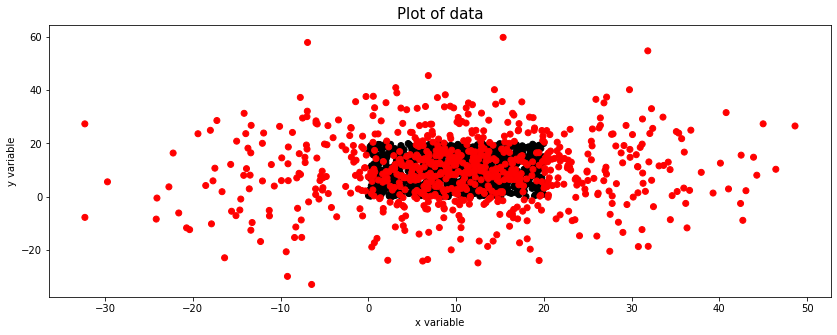

In [30]:
colors = ['red', 'black'] 

plt.figure(figsize=(14,5))
plt.scatter(df['0'], df['1'], c=df['class'], cmap=ListedColormap(colors))
plt.xlabel('x variable')
plt.ylabel('y variable')
plt.title('Plot of data', size=15)

In [31]:
# Create training and test set

X = df.iloc[:,:2].values
y = df.iloc[:,2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, 
                                                    shuffle=True)

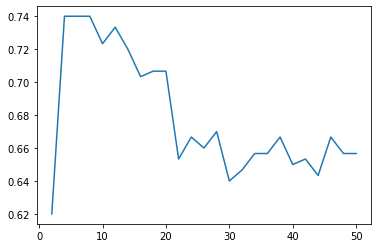

In [32]:
# Task a
# Decision Tree Classifier

accuracies = []
for i in range(2, 52,2):
    
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))
    
plt.plot(range(2, 52,2), accuracies)

# When max_depth is 2, the model is underfitting, then our model performs optimally around 5-10.
# When the accuracy curve is decreasing, it gets overfitting

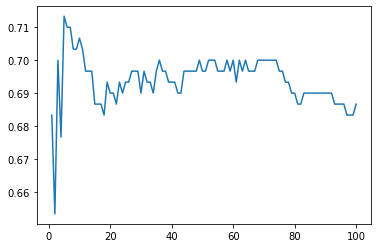

In [33]:
# Task b
# K Nearest Neighbor

accuracies = []
for i in range(1, 101):
    
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))
    
plt.plot(range(1, 101), accuracies)

# When n_neighbors starts from 2, the model is underfitting, then our model performs optimally 
# around 10. When the accuracy curve is decreasing after _neighbors=20, it gets overfitting

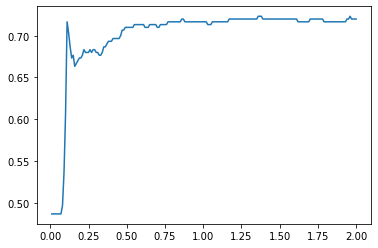

In [34]:
# Support Vector Machine

accuracies = []
C = np.linspace(0.01, 2.0, 200)
for i in C:
    
    model = SVC(C=i)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))
    
plt.plot(C, accuracies)

# When C=2, the model is underfitting, then our model performs optimally around C=0.13
# Here the curve is not decreasing, hence the model does not overfit